# Regresión Lineal

### 1. Generación del conjunto de datos

In [38]:
import numpy as np
import pandas as pd

#importar y verificar si .csv existe
import os
if os.path.exists("AllData.csv"):
    df = pd.read_csv("AllData.csv")
else:
    print("Error: El archivo 'AllData.csv' no existe.")

print("Total de datos en el DataFrame:", df.shape[0])

if df.isnull().sum().sum() > 0:
    print("Advertencia: Hay valores nulos en el DataFrame.")

#Selección variable independiente y dependiente para la regresión lineal
X = df[['radiacion_solar']]
y = df['temp_aire']

#verificar si los datos se cargaron correctamente
print(df.head())

Total de datos en el DataFrame: 69
   Fecha  humedad_relativa  radiacion_solar  temp_aire
0  16-01              60.0             31.0       18.6
1  16-02              55.0             30.3       20.3
2  16-03              47.2             25.1       20.0
3  16-04              54.8             15.8       16.0
4  16-05              47.3             10.6       14.7


### 2. Visualización del conjunto de datos

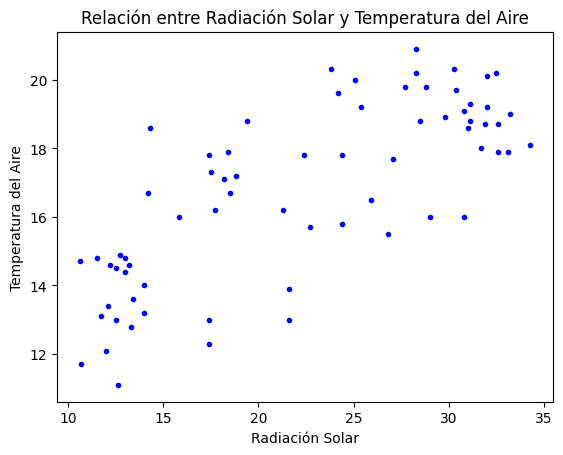

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Relación entre Radiación Solar y Temperatura del Aire")
plt.plot(X, y, "b.")
plt.xlabel("Radiación Solar")
plt.ylabel("Temperatura del Aire")
plt.show()

### 3. Modificación del conjunto de datos

In [36]:
#Reorganización del DataFrame
df = pd.concat([X, y], axis=1)
df.columns = ['radiacion_solar', 'temp_aire']
df.head()

,radiacion_solar,temp_aire
0,31.0,18.6
1,30.3,20.3
2,25.1,20.0
3,15.8,16.0
4,10.6,14.7


### 4. Construcción del modelo

In [39]:
from sklearn.linear_model import LinearRegression

#Entrenamiento del Modelo: Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['radiacion_solar'].values.reshape(-1, 1), df['temp_aire'].values)

LinearRegression()

In [44]:
#Valores para la ecuación de la recta de regresión

# Obtiene el valor del interceptor que representa el valor de temp_aire cuando radiacion_solar es 0.
# Parámetro theta 0 
lin_reg.intercept_

#Obtiene la pendiente que indica cuánto cambia temp_aire por cada unidad de radiacion_solar.
# Parámetro theta 1
lin_reg.coef_

array([0.25500708])

In [47]:
#X_min_max almacena el valor mínimo y máximo de radiacion_solar.
#lin_reg.predict(X_min_max): Calcula las predicciones para estos valores.

X_min_max = np.array([[df["radiacion_solar"].min()], [df["radiacion_solar"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

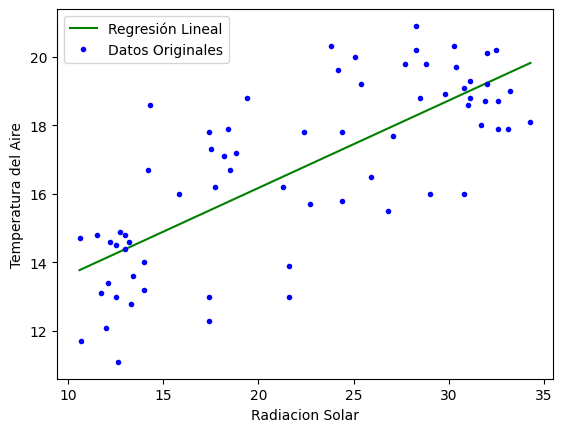

In [50]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['radiacion_solar'], df['temp_aire'], "b.")

plt.xlabel("Radiacion Solar")
plt.ylabel("Temperatura del Aire")
plt.legend(["Regresión Lineal", "Datos Originales"])
plt.show()

### 5. Predicción de nuevos ejemplos

In [26]:
# Crea un nuevo dato con radiacion_solar = 100
x_new = np.array([[100]]) 
prediccion = lin_reg.predict(x_new) 

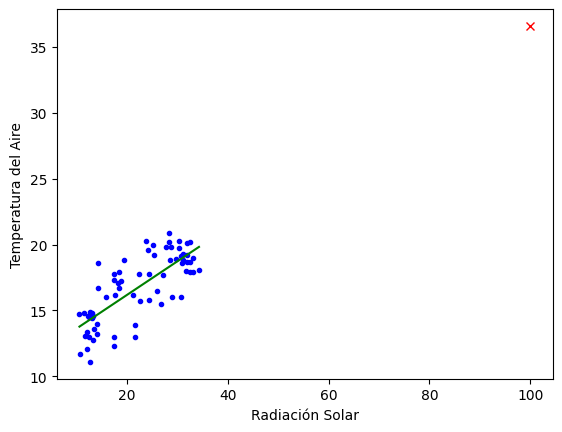

In [27]:
plt.plot(df['radiacion_solar'], df['temp_aire'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, prediccion, "rx")
plt.xlabel("Radiación Solar")
plt.ylabel("Temperatura del Aire")
plt.show()